In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv(r'C:/Users/60547/Documents/py/python_lianxi/datasets/logistic_regression/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#查看class类别的值分布  
count_class=pd.value_counts(df['Class'],sort=True).sort_index()
count_class

0    284315
1       492
Name: Class, dtype: int64

样本极度不均衡

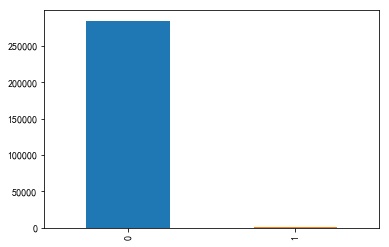

In [6]:
#pandas dataframe也可以直接画图,数据放在前面
count_class.plot(kind='bar')

In [7]:
#amount列数值变化较大,而其他列都经过了处理,基本都在正负1之间变换,因此需要对amount列进行标准化处理
from sklearn.preprocessing import StandardScaler
df['normamount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df=df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normamount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
#采用下采样的方法将class=0的数据截取部分  使其数量和class=1的数据量 一样
y_df=df.ix[:,df.columns=='Class']
x_df=df.ix[:,df.columns!='Class']

num_data_frauds=len(df[df['Class']==1])
frauds_indice=np.array(df[df['Class']==1].index)


norm_indice=df[df['Class']==0].index

#从class=0的值取出来部分匹配class=1
random_norm_indice=np.random.choice(norm_indice,num_data_frauds,replace=False)
random_norm_indice=np.array(random_norm_indice)

#将两部分数据整合
under_sample_indices=np.concatenate([random_norm_indice,frauds_indice])

#对应的提取出原来数据中对用under_sample_indices的值
under_sample_dataset=df.iloc[under_sample_indices,:]

x_under_sample_dataset=under_sample_dataset.ix[:,under_sample_dataset.columns!='Class']
y_under_sample_dataset=under_sample_dataset.ix[:,under_sample_dataset.columns=='Class']
x_under_sample_dataset
print(len(y_under_sample_dataset))

984


In [9]:
#将数据进行拆分
from sklearn.model_selection import train_test_split
#整个数据进行拆分
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.3,random_state=0)

#下采集的数据进行拆分
x_under_sample_train,x_under_sample_test,y_under_sample_train,y_under_sample_test=train_test_split(x_under_sample_dataset,y_under_sample_dataset,
                                                                                                  test_size=0.3,random_state=0)

print('Total amount of 总数居 is :',len(x_train)+len(x_test))
print('Total amount of 下采集 is:',len(x_under_sample_train)+len(x_under_sample_test))


Total amount of 总数居 is : 284807
Total amount of 下采集 is: 984


In [10]:
#recall=TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [11]:
def print_KFold_scores(x_train_data,y_train_data):
    fold=KFold(5,shuffle=False)
    
    print(KFold)
    print('--------------------------------------------\n')
    
    #不同的c_parameters
    c_parameters=[0.01,0.1,1,10,100]

    result_table=pd.DataFrame(index=range(len(c_parameters),2),columns=['c_parameters','mean_recall_score'])
    result_table['c_parameters']=c_parameters
    
    j=0
    for c_para in c_parameters:
        print('---------------------------------')
        print('c_para:',c_para)
        print('----------------------------------')
        print('')
        
        recal_accs=[]
        for iteration,indices in enumerate(fold.split(x_train_data),start=1):
            lr=LogisticRegression(C=c_para,penalty='l1')
            
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            
            
            #进行预测
            y_pred_undersample=lr.predict(x_train_data.iloc[indices[1],:].values)
            
            #计算分数
            recal_acc=recall_score(y_train_data.iloc[indices[1],:],y_pred_undersample)
            recal_accs.append(recal_acc)
            
            #打印界面
            print('Iteration ', iteration,': recall score = ', recal_acc)
            
        result_table.ix[j,'mean_recall_score']=np.mean(recal_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recal_accs))
        print('')
        
    result_table['mean_recall_score']=result_table['mean_recall_score'].astype(float)       
    best_c=result_table.iloc[result_table['mean_recall_score'].idxmax()]['c_parameters']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c
            

In [12]:
best_c=print_KFold_scores(x_under_sample_train,y_under_sample_train)


<class 'sklearn.model_selection._split.KFold'>
--------------------------------------------

---------------------------------
c_para: 0.01
----------------------------------

Iteration  1 : recall score =  0.9846153846153847
Iteration  2 : recall score =  0.9846153846153847
Iteration  3 : recall score =  0.9240506329113924
Iteration  4 : recall score =  0.9841269841269841
Iteration  5 : recall score =  0.9436619718309859

Mean recall score  0.9642140716200263

---------------------------------
c_para: 0.1
----------------------------------

Iteration  1 : recall score =  0.9230769230769231
Iteration  2 : recall score =  0.8923076923076924
Iteration  3 : recall score =  0.8481012658227848
Iteration  4 : recall score =  0.9365079365079365
Iteration  5 : recall score =  0.9295774647887324

Mean recall score  0.9059142565008138

---------------------------------
c_para: 1
----------------------------------

Iteration  1 : recall score =  0.9384615384615385
Iteration  2 : recall score =  0

In [13]:
def plot_confusion_matrix(cm,classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=0)
    plt.yticks(tick_marks,classes)
    
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',
                color='white' if cm[i,j]>thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

Recall score in the testing dataset: 0.9395973154362416
accuracy score in the testing dataset: 0.9054054054054054


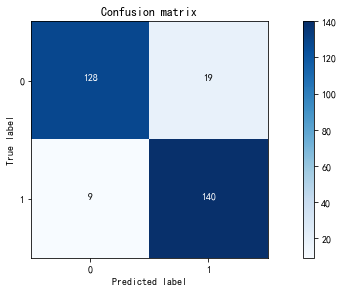

In [14]:
import itertools
lr=LogisticRegression(C= best_c,penalty='l1')
lr.fit(x_under_sample_train,y_under_sample_train.values.ravel())
y_predict_undersample=lr.predict(x_under_sample_test.values)

#绘制混淆矩阵
cnf_matrix=confusion_matrix(y_under_sample_test,y_predict_undersample)
np.set_printoptions(precision=2)
#打印召回率的分数
print('Recall score in the testing dataset:',cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print('accuracy score in the testing dataset:',(cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[1,1]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[0,0]))
class_names=[0,1]
plt.figure(figsize=(10,4))
plot_confusion_matrix(cnf_matrix,class_names)
plt.show()


Recall score in the testing dataset: 0.9455782312925171
accuracy score in the testing dataset: 0.8958018796156502


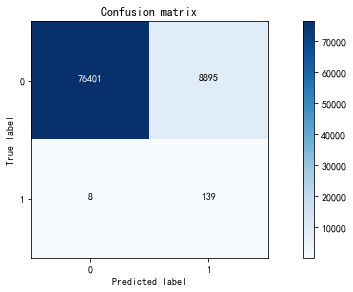

In [15]:
#测试下用下采集方法训练出来的算法    对整个数据 的效果
lr=LogisticRegression(C= best_c,penalty='l1')
lr.fit(x_under_sample_train,y_under_sample_train.values.ravel())
y_predict=lr.predict(x_test.values)

#绘制混淆矩阵
cnf_matrix=confusion_matrix(y_test,y_predict)
np.set_printoptions(precision=2)
#打印召回率的分数
print('Recall score in the testing dataset:',cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
print('accuracy score in the testing dataset:',(cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[1,1]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[0,0]))
class_names=[0,1]
plt.figure(figsize=(10,4))
plot_confusion_matrix(cnf_matrix,class_names)
plt.show()


threshhold selected: 0.1
Recall metric in the testing dataset: 1.0
accuracy score in the testing dataset: 0.0018140748803295765
--------------------------------
threshhold selected: 0.2
Recall metric in the testing dataset: 1.0
accuracy score in the testing dataset: 0.003534520089416336
--------------------------------
threshhold selected: 0.3
Recall metric in the testing dataset: 1.0
accuracy score in the testing dataset: 0.026216307947988716
--------------------------------
threshhold selected: 0.4
Recall metric in the testing dataset: 0.9863945578231292
accuracy score in the testing dataset: 0.4314338213779947
--------------------------------
threshhold selected: 0.5
Recall metric in the testing dataset: 0.9455782312925171
accuracy score in the testing dataset: 0.8957082499444073
--------------------------------
threshhold selected: 0.6
Recall metric in the testing dataset: 0.8775510204081632
accuracy score in the testing dataset: 0.9824678440597825
--------------------------------


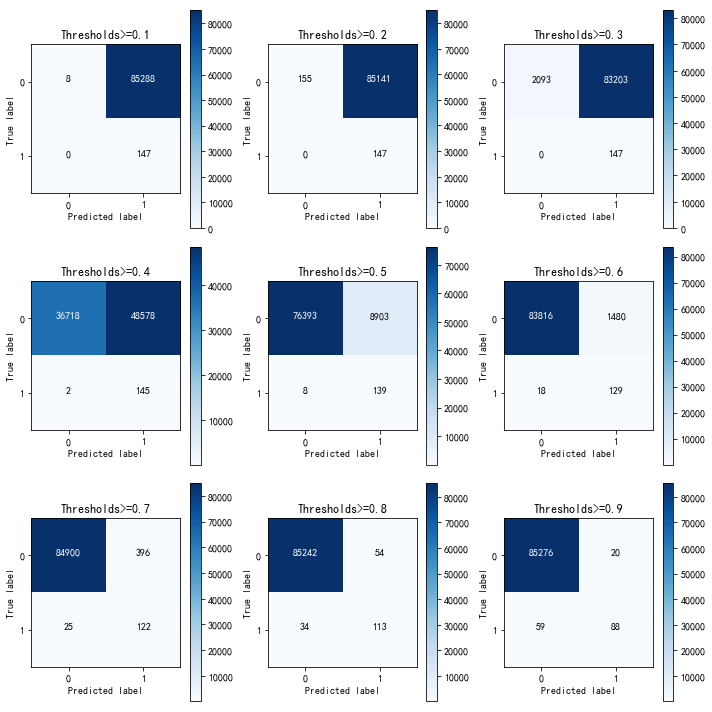

In [16]:
#设置不同的thresholds
lr=LogisticRegression(C=0.01,penalty='l1')
lr.fit(x_under_sample_train,y_under_sample_train)
y_predict_proba=lr.predict_proba(x_test)
threshholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))
j=1
for i in threshholds:
    y_test_predictions_high_recall=y_predict_proba[:,1]>i
    plt.subplot(3,3,j)
    j+=1
    
    #画图
    cnf_matrix=confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    print('threshhold selected:',i)
    print('Recall metric in the testing dataset:',cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    print('accuracy score in the testing dataset:',(cnf_matrix[1,1]+cnf_matrix[0,0])/(cnf_matrix[1,1]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[0,0]))
    print('--------------------------------')
    class_names=[0,1]
    plot_confusion_matrix(cnf_matrix,class_names,title='Thresholds>=%s'%i)
    

#以下采用过采集将数据较少的部分数据进行随机生成



In [17]:

from imblearn.over_sampling import SMOTE


In [18]:
creditcard=pd.read_csv(r'C:/Users/60547/Documents/py/python_lianxi/datasets/logistic_regression/creditcard.csv')
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
columns=creditcard.columns
features_columns=columns.delete(len(columns)-1)
features=creditcard[features_columns]
labels=creditcard['Class']


In [20]:
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.2,random_state=0)
oversampler=SMOTE(random_state=0)
#分离好训练集和测试集后  利用SMOTE进行生成同等数量的样本
osfeatures,oslabels=oversampler.fit_sample(features_train,labels_train)
count_class=pd.value_counts(oslabels)
count_class


1    227454
0    227454
dtype: int64

In [21]:
osfeatures=pd.DataFrame(osfeatures)
oslabels=pd.DataFrame(oslabels)
best_c=print_KFold_scores(osfeatures,oslabels)


<class 'sklearn.model_selection._split.KFold'>
--------------------------------------------

---------------------------------
c_para: 0.01
----------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.9677326546420272
Iteration  4 : recall score =  0.9578153680438773
Iteration  5 : recall score =  0.9584638550906233

Mean recall score  0.9338142601053903

---------------------------------
c_para: 0.1
----------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.9704326657076463
Iteration  4 : recall score =  0.9600795770545498
Iteration  5 : recall score =  0.9599696639957793

Mean recall score  0.9351082659016801

---------------------------------
c_para: 1
----------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0

Recall metric in the testing dataset:  0.9108910891089109


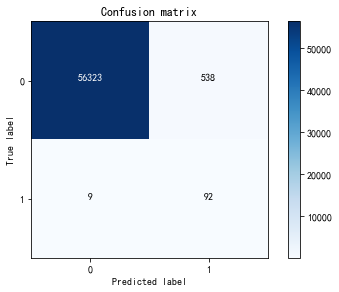

In [22]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(osfeatures,oslabels.values.ravel())
y_pred = lr.predict(features_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()